<span style="color:#195879">

## Minimum Viable Data Enthusiast
</span>

<span style="font-size:14.0pt">
<strong>Author:</strong></span> <span style="font-size:13.0pt">Manfredo E. Aceituno</span><br>
<span style="font-size:14.0pt"><strong>Date:</strong></span> <span style="font-size:13.0pt">June, 2024</span><br>
<span style="font-size:14.0pt"><strong>Programming language:</strong></span> <span style="font-size:13.0pt">Python</span>

<span style="color:red">

# Netflix Dataset 
</span>

### Exploratory data analysis

<span style="font-size:12.5pt">Performing Data cleaning steps, to have a robust dataset and avoid common data quality issues. In summary, the data process will involve: identifying and correcting errors, and improve the data format for its usability in producing insights and good results for further analysis.

*Source of the original dataset:* https://www.kaggle.com/datasets/arnavvvvv/netflix-movies-and-tv-shows/data

## Table of Contents
<a id="table_content"></a>
1. [Introduction](#Introduction)
2. [Libraries](#Library)
3. [Data upload](#Data-upload)
4. [Data summary & exploration](#Data-summary)
5. [Data cleaning and transformation](#Data-munging)  
   5.1 [Cleaned data into a CSV](#Usable-df)
6. [Movie Genres' exploration DataFrame](#Genre-df-matrix)  
   6.1 [Movie genres' classification into a CSV](#Usable-df-matrix)

## 1. Introduction
<a id="Introduction"></a>
<span style="font-size:13.0pt">**Title of the dataset:** Netflix Movies and TV Shows Dataset.  

<span style="font-size:13.0pt">**Description:** The information is in a CSV format dataset which contains information of movies and TV shows available on Netflix up to the year 2021. The dataset includes variables such as title, director, cast, country, date added, release year, rating, duration, listed genres, and description of the TV show.

<span style="font-size:12.0pt">

***The variables of the Dataset are:***
* type: Indicates whether the entry is a movie or a TV show.  
* title: Title of the movie or TV show.  
* director: Director(s) of the movie or TV show.  
* cast: Cast of the movie or T show.  
* country: Country where the movie or TV show was produced.  
* date_added: Date when the movie or TV show was added to Netflix.  
* release_year: Year when the movie or TV show was released.  
* rating: Content rating of the movie or TV   show.  
* duration: Duration of the movie or TV show.  
* listed_in: Genres or categories the movie or TV show belongs to.  
* description: Brief description of the movie or TV show.

[Return to: Table of contents](#table_content)

## 2. Libraries
<a id="Library"></a>

[Return to: Table of contents](#table_content)

In [1]:
import pandas as pd
import missingno as mn
import re # regular expressions library

## 3. Data upload
<a id="Data-upload"></a>

[Return to: Table of contents](#table_content)

In [2]:
# Load data in a DataFrame called df_netflix
df_netflix = pd.read_csv("netflix_titles.csv")

In [3]:
df_netflix.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."


# 4. Data summary and exploration
<a id="Data-summary"></a>
<span style="font-size:1.25em;">Making a brief inspection of each series name, type and NaN's.</span>

[Return to: Table of contents](#table_content)

In [4]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


<span style="font-size:1.25em">Representing missing values for each variable of the dataset.</span>

<AxesSubplot:>

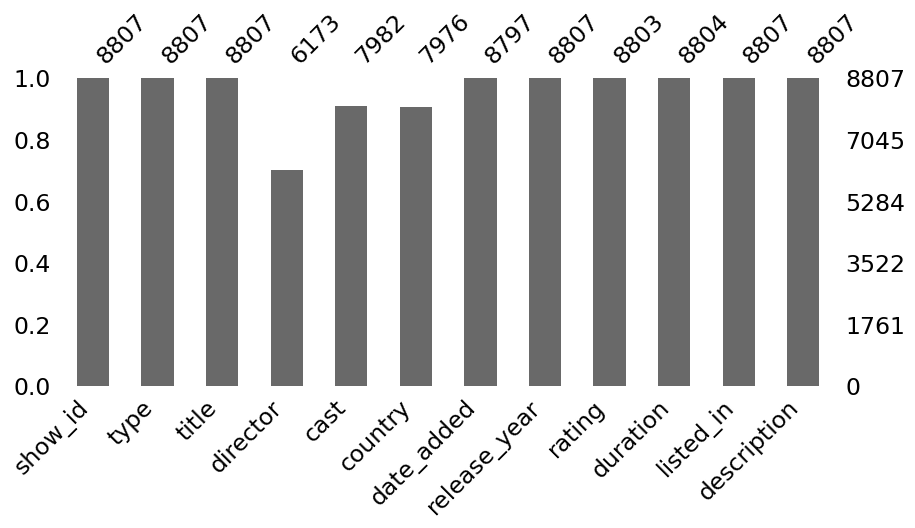

In [5]:
missing_values = mn.bar(df_netflix,fontsize=17, figsize=(10,4))
missing_values

<span style="font-size:1.25em">It is clearly noted that the main Series of the DataFrame with which we will have to work in filling or adjusting data are: **'director', 'cast', 'country'**, given that these have more NaN's.</span>

# 5. Data cleaning and transformation
<a id="Data-munging"></a>

[Return to: Table of contents](#table_content)

<span style="font-size:1.25em">The **".fillna()"** method will be applied for fields that do not have information on the name of the director of the series or movie.

In [6]:
# The main DataFrame won't be changed. Therefore, "fill_missing_df" is created.
fill_missing_df = df_netflix

In [7]:
fill_missing_df["director"].fillna("no_director", inplace=True)
fill_missing_df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,no_director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


<span style="font-size:1.25em">The exact same process will be carried out **fillna()** para **'cast', 'country', 'date_added', 'rating'** and **'duration'**.</span>

<span style="font-size:1.25em">Not having a volume of data between several columns can affect the quality of the analysis in terms of representativeness or level of statistical confidence. Different methods can be approached such as:

* <span style="font-size:1.25em">Delete rows with missing data.
* <span style="font-size:1.25em">Prompting manual or automatic filling from other sources.
* <span style="font-size:1.25em">Use some machine learning or math functions.
* <span style="font-size:1.25em">Others.

<span style="font-size:1.25em">Whatever the methods to be used, they must be documented, an analysis must be made of the impact it generates on the results, and the reason why the information was received incomplete from the source or database must also be investigated.</span>

[Return to: Table of contents](#table_content)

In [8]:
# Dicitionary values for the fillna().
replace_values = {"cast":"no_cast","country":"no_country",
                  "date_added":"no_date", "rating":"no_rating",
                  "duration":"no_duration"}

fill_missing_df.loc[: , replace_values.keys()] = fill_missing_df[replace_values.keys()].fillna(replace_values)

In [9]:
fill_missing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


<span style="font-size:1.25em">**Cleaning and fixing the "date_added" series.**
A new column will be created where the **"date time"** type data will be stored and for the fields with the value "no_date" it will be filled with <span style="color:purple">**None**</span>.

In [10]:
def convert_date(date_text):
    """
    Function that converts a date text string into a 'month_name' 'day_number' 'year_number' to datetime format.

    Args:
        date_text (str): date text to convert.

    Returns:
        datetime: an object type datetime according to the data, or 'None' if the value is 'no_date'
    """
    if date_text == "no_date":
        return None

    # decomposing the date text original format
    try:
        date_parts = date_text.split(maxsplit=2)

        if len(date_parts) == 1:
            return None

        month_text, day_text = date_parts[:2] # Extract month & day if present

        # Extract the integer part of the day
        day_num = int(day_text.split(",")[0])
        year_num = date_parts[-1] # Extracts the year

        # converting the month_name to number [1-12]
        try:
            month_num = {"January":1, "February":2, "March":3, "April":4, "May":5,
                         "June":6, "July":7, "August":8, "September":9, "October":10,
                         "November":11, "December":12}[month_text]
        except KeyError:
            return None # Invalid month names if present

        # creating the datetime object
        try:
            return pd.to_datetime(f"{year_num}-{month_num:02}-{day_num:02}") # :02 ensures that the date components (month_num and day_num) always have two digits.
        # Value to 
        except ValueError:
            return None
            
    # Closing for the initial 'try' block
    except (ValueError, IndexError):
        return None  # Handle various errors

<span style="font-size:1.25em">**Notes:** in *`pd.to_datime`* the `:02` format is applied to each of the date variables (month_num and day_num). This format indicates that numeric values ​​should be represented with a width of two digits.

* <span style="font-size:1.25em">If the original value has a single digit, a leading zero will be added to complete the two digits. For example, the number 5 becomes "05."
* <span style="font-size:1.25em">If the original value has two or more digits, it is not modified.

[Return to: Table of contents](#table_content)

In [11]:
# Copying the column "date_added" to a new one called "clean_date_added"
clean_date_added = fill_missing_df["date_added"].copy()
clean_date_added

0       September 25, 2021
1       September 24, 2021
2       September 24, 2021
3       September 24, 2021
4       September 24, 2021
               ...        
8802     November 20, 2019
8803          July 1, 2019
8804      November 1, 2019
8805      January 11, 2020
8806         March 2, 2019
Name: date_added, Length: 8807, dtype: object

In [12]:
# Testing the function conversion to the "clean_date_added" Series.
clean_date_added.apply(convert_date)

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8807, dtype: datetime64[ns]

In [13]:
# Once it is demonstrated that the function worked, then the date format conversion is inserted into a new column of the dataframe "fill_missing_df"
fill_missing_df["clean_date_added"] = clean_date_added.apply(convert_date)
fill_missing_df.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,clean_date_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,no_cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25
1,s2,TV Show,Blood & Water,no_director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",no_country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24
3,s4,TV Show,Jailbirds New Orleans,no_director,no_cast,no_country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24


In [14]:
# Verifying that the NaN values were turned to "None" in the Series "clean_date_added"
fill_missing_df["clean_date_added"].isnull().value_counts(normalize=True).round(4)*100

False    99.89
True      0.11
Name: clean_date_added, dtype: float64

<span style="font-size:1.25em">In the previous output it is noticed that 0.11% of the date_added is missing in the dataframe.

In [15]:
# Deleting the" date_added" column which has string type data and is no longer useful.
fill_missing_df.drop("date_added", axis=1, inplace=True)

In [16]:
# Renaming the "cleaned date" column
fill_missing_df.rename(columns={"clean_date_added":"date_added"},inplace=True)

In [17]:
# Renaming the "listed_in" column to "genre"
fill_missing_df.rename(columns={"listed_in":"genre"},inplace=True)

In [18]:
# Setting "show_id" as the index of the Dataframe "fill_missing_df"
fill_missing_df.set_index("show_id", inplace=True)

In [19]:
fill_missing_df.head(4) # Verifying the changes of the index

,type,title,director,cast,country,release_year,rating,duration,genre,description,date_added
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,no_cast,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25
s2,TV Show,Blood & Water,no_director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",no_country,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24
s4,TV Show,Jailbirds New Orleans,no_director,no_cast,no_country,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24


In [20]:
# Noticing that many Movies/Series have more than one category, and can't be analized individually in such list structure.  
fill_missing_df["genre"]

show_id
s1                                           Documentaries
s2         International TV Shows, TV Dramas, TV Mysteries
s3       Crime TV Shows, International TV Shows, TV Act...
s4                                  Docuseries, Reality TV
s5       International TV Shows, Romantic TV Shows, TV ...
                               ...                        
s8803                       Cult Movies, Dramas, Thrillers
s8804               Kids' TV, Korean TV Shows, TV Comedies
s8805                              Comedies, Horror Movies
s8806                   Children & Family Movies, Comedies
s8807       Dramas, International Movies, Music & Musicals
Name: genre, Length: 8807, dtype: object

In [21]:
# Extracting the genres to a unique values list.

unique_categories_list = [] # Empty list that will store the unique genres
for category in fill_missing_df["genre"]:
    category_list = category.split(",")
    
    category_list = [category.strip() for category in category_list]
    
    for category in category_list:
        if category not in unique_categories_list:
            unique_categories_list.append(category)

print(unique_categories_list [:10]) # Show the list of unique movie/series categories (Only the first ten genres)
print(f"There are {len(unique_categories_list)} genres in the dataset.")

['Documentaries', 'International TV Shows', 'TV Dramas', 'TV Mysteries', 'Crime TV Shows', 'TV Action & Adventure', 'Docuseries', 'Reality TV', 'Romantic TV Shows', 'TV Comedies']
There are 42 genres in the dataset.


In [22]:
# Analyzing the "rating" classification since there are values that don't follow the international labeling.
pd.Series(fill_missing_df["rating"]).value_counts()

TV-MA        3207
TV-14        2160
TV-PG         863
R             799
PG-13         490
TV-Y7         334
TV-Y          307
PG            287
TV-G          220
NR             80
G              41
TV-Y7-FV        6
no_rating       4
NC-17           3
UR              3
74 min          1
84 min          1
66 min          1
Name: rating, dtype: int64

In [23]:
# Dicitonary to classify the movie ratings with a description
movie_ratings_dict = {
  "G": "All ages", "PG": "Parental guidance", "PG-13": "Teens", "R": "Restricted (17+)",
  "NC-17": "Adults Only", "NR": "Not Rated", "UR": "Unrated", 
    # Television Ratings
    "TV-Y": "All children", "TV-Y7": "Older kids (7+)", "TV-Y7-FV": "Fantasy Violence",  
    # Not standard rating 
    "TV-G": "All ages", "TV-PG": "Parental guidance", "TV-14": "Parents cautioned",
  "TV-MA": "Mature audiences"
}

In [24]:
# Creating a lookup Series from the dictionary of movie's rating descriptions
rating_descriptions = pd.Series(movie_ratings_dict, index=movie_ratings_dict.keys())
rating_descriptions

G                    All ages
PG          Parental guidance
PG-13                   Teens
R            Restricted (17+)
NC-17             Adults Only
NR                  Not Rated
UR                    Unrated
TV-Y             All children
TV-Y7         Older kids (7+)
TV-Y7-FV     Fantasy Violence
TV-G                 All ages
TV-PG       Parental guidance
TV-14       Parents cautioned
TV-MA        Mature audiences
dtype: object

In [25]:
# Using vectorized mapping to assign descriptions based on ratings and fill it into a new column called "rating_description"
fill_missing_df['rating_description'] = fill_missing_df['rating'].map(rating_descriptions)

# Filling missing values with "no_rating" (assuming NaN for missing values)
fill_missing_df['rating_description'].fillna('no_rating', inplace=True)

fill_missing_df.head(4)

,type,title,director,cast,country,release_year,rating,duration,genre,description,date_added,rating_description
show_id,,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,no_cast,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,Teens
s2,TV Show,Blood & Water,no_director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,Mature audiences
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",no_country,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,Mature audiences
s4,TV Show,Jailbirds New Orleans,no_director,no_cast,no_country,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24,Mature audiences


In [26]:
# Taking a look to the "duration" variable to separate the duration_value and duration_time_unit
pd.Series(fill_missing_df["duration"]).unique()[:30]

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min'], dtype=object)

In [27]:
# Creating the new columns to place the values for further analysis
fill_missing_df["duration_value"] = " " # Empty column
fill_missing_df["duration_time_unit"] = " " # Empty column

In [28]:
# Extracting values and units of time duration using the function of regular expressions
for index, row in fill_missing_df.iterrows():
  duration_string = row["duration"]  # "duration_string" stores de string value of each row of the column "duration"

# Extract numeric value using regular expressions
  match = re.search(r"(\d+) (\w+)", duration_string) # assigning the regular expression pair output to the variable "match" digit and word
  if match:
    duration_value = int(match.group(1)) # group(1) is the regular expression index to be evaluated and test if it is or not an integer
    duration_time_unit = str(match.group(2))
  else:
    duration_value = None
    duration_time_unit = None

# Now, 'fill_missing_df' will have 'duration_value' and 'duration_time_unit' with separated values and units.
  # Update the new columns for the current row
  fill_missing_df.loc[index, "duration_value"] = duration_value
  fill_missing_df.loc[index, "duration_time_unit"] = duration_time_unit

In [29]:
# Visualizing the DataFrame with the previous changes
fill_missing_df.head(4)

,type,title,director,cast,country,release_year,rating,duration,genre,description,date_added,rating_description,duration_value,duration_time_unit
show_id,,,,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,no_cast,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,Teens,90,min
s2,TV Show,Blood & Water,no_director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,Mature audiences,2,Seasons
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",no_country,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,Mature audiences,1,Season
s4,TV Show,Jailbirds New Orleans,no_director,no_cast,no_country,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24,Mature audiences,1,Season


In [30]:
# Reordering columns of the DataFrame
columns_new_order = ['type', 'title', 'director', 'cast', 'country', 'release_year', 'date_added',
                 'rating', 'rating_description', 'duration', 'duration_value', 'duration_time_unit',
                'genre', 'description']

fill_missing_df = fill_missing_df.reindex(columns=columns_new_order)

In [31]:
# Visualizing the DataFrame with the ordered columns and cleaned data
fill_missing_df.head(3)

,type,title,director,cast,country,release_year,date_added,rating,rating_description,duration,duration_value,duration_time_unit,genre,description
show_id,,,,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,no_cast,United States,2020,2021-09-25,PG-13,Teens,90 min,90,min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,no_director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,2021-09-24,TV-MA,Mature audiences,2 Seasons,2,Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",no_country,2021,2021-09-24,TV-MA,Mature audiences,1 Season,1,Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [32]:
# Taking a look to the value types of each column and make a conversion type value if necessary
fill_missing_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   type                8807 non-null   object        
 1   title               8807 non-null   object        
 2   director            8807 non-null   object        
 3   cast                8807 non-null   object        
 4   country             8807 non-null   object        
 5   release_year        8807 non-null   int64         
 6   date_added          8797 non-null   datetime64[ns]
 7   rating              8807 non-null   object        
 8   rating_description  8807 non-null   object        
 9   duration            8807 non-null   object        
 10  duration_value      8804 non-null   object        
 11  duration_time_unit  8804 non-null   object        
 12  genre               8807 non-null   object        
 13  description         8807 non-null   object        


<span style="font-size:13.0pt">We can observe that the variables <span style="color:purple"> **'date_added', 'duration_value', 'duration_time_unit'** </span> have **NaN** values. Since there are no more than 11 or 10 missing values which represent less than 0.15% of the data, they can either be filled manually taking the data from external sources or left kept as **NaN** and discard them for further analysis.

[Return to: Table of contents](#table_content)

In [33]:
# Missing resume for the mentioned variables
print(f' % of missing values for date_added\n{fill_missing_df["date_added"].isnull().value_counts(normalize=True).round(4)*100}')
print(f'\n % of missing values for duration_value\n{fill_missing_df["duration_value"].isnull().value_counts(normalize=True).round(4)*100}')
print(f'\n % of missing values for duration_time_unit\n{fill_missing_df["duration_time_unit"].isnull().value_counts(normalize=True).round(4)*100}')

 % of missing values for date_added
False    99.89
True      0.11
Name: date_added, dtype: float64

 % of missing values for duration_value
False    99.97
True      0.03
Name: duration_value, dtype: float64

 % of missing values for duration_time_unit
False    99.97
True      0.03
Name: duration_time_unit, dtype: float64


In [34]:
# Fill missing values with "no_rating" (assuming NaN for missing values)

# Dicitionary values for the fillna().
missing_values = {"date_added":"no_date", "duration_value":"no_value",
                  "duration_time_unit":"no_unit"}

fill_missing_df.loc[: , missing_values.keys()] = fill_missing_df[missing_values.keys()].fillna(missing_values)

In [35]:
# Taking again a look to the value types of each column and make a conversion type value if necessary
fill_missing_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   type                8807 non-null   object
 1   title               8807 non-null   object
 2   director            8807 non-null   object
 3   cast                8807 non-null   object
 4   country             8807 non-null   object
 5   release_year        8807 non-null   int64 
 6   date_added          8807 non-null   object
 7   rating              8807 non-null   object
 8   rating_description  8807 non-null   object
 9   duration            8807 non-null   object
 10  duration_value      8807 non-null   object
 11  duration_time_unit  8807 non-null   object
 12  genre               8807 non-null   object
 13  description         8807 non-null   object
dtypes: int64(1), object(13)
memory usage: 1.3+ MB


In [36]:
# Cleaned and prepared DataFrame for further data analysis
fill_missing_df.head(3)

,type,title,director,cast,country,release_year,date_added,rating,rating_description,duration,duration_value,duration_time_unit,genre,description
show_id,,,,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,no_cast,United States,2020,2021-09-25 00:00:00,PG-13,Teens,90 min,90,min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,no_director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,2021-09-24 00:00:00,TV-MA,Mature audiences,2 Seasons,2,Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",no_country,2021,2021-09-24 00:00:00,TV-MA,Mature audiences,1 Season,1,Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


<span style="font-size:12.5pt">Practically, the data cleaning and munging processes are done. The **NaN values** and **data types** of the Series are correct. From here, we can start applying methods, creating new DataFrames doing a descriptive analysis and obtaining insights.<span>

<span style="font-size:12.5pt">The DataFrame could be converted to *.csv*, *.xlsx*, or other desired format.

***Code sample:***  
filename = "my_dataFrame.csv"  
dataframeName.to_csv(filename, index=True)  # Include index from CSV  
print(f"DataFrame successfully converted to CSV: {filename}")

[Return to: Table of contents](#table_content)

## 5.1 Generating CSV file with cleansed data
<a id="Usable-df"></a>

<span style="font-size:13.0pt"> Once we have cleaned and tabulated the data, if we are no longer going to transform the DataFrame, then we can convert the DataFrame to a file type *".csv"*, *".xlsx"*, *".html"*, etc. As we need it.  
And this file can be used for the descriptive, predictive, prescriptive analysis, or any other stages, 
according to the data and insights needs.

[Return to: Table of contents](#table_content)

In [37]:
file_name1 = "netflix_ready_file.csv"
# fill_missing_df.to_csv(file_name1, index=True)
print(f"{file_name1} was saved as .csv")

netflix_ready_file.csv was saved as .csv


<span style="color:orange">

# 6. Movie genres' category exploration 

</span>
<a id="Genre-df-matrix"></a>

<span style="font-size:13.0pt">From the list ***'unique_categories_list'*** a new Dataframe is going to be created so that the Genres' distribution by Duration, Year and Country can be analyzed.  
To achieve this, we can create a new matrix filled with 1s and 0s. Each row in the matrix will represent a movie, and each column will represent a category. A value of 1 will indicate that the movie belongs to that category, while a 0 will indicate it doesn't.

[Return to: Table of contents](#table_content)

In [38]:
unique_categories_list # List of Genres
ready_df = fill_missing_df # DataFrame to be taken for visualization and analysis

In [39]:
# Creating a Genres' matrix that includes: "type, country, date_added"

genre_df = ready_df.loc[:, ["title", "type", "date_added", "country", "release_year", "rating", 
                            "rating_description", "duration_value", "duration_time_unit","genre"]]
genre_df.head(3)

,title,type,date_added,country,release_year,rating,rating_description,duration_value,duration_time_unit,genre
show_id,,,,,,,,,,
s1,Dick Johnson Is Dead,Movie,2021-09-25 00:00:00,United States,2020,PG-13,Teens,90,min,Documentaries
s2,Blood & Water,TV Show,2021-09-24 00:00:00,South Africa,2021,TV-MA,Mature audiences,2,Seasons,"International TV Shows, TV Dramas, TV Mysteries"
s3,Ganglands,TV Show,2021-09-24 00:00:00,no_country,2021,TV-MA,Mature audiences,1,Season,"Crime TV Shows, International TV Shows, TV Act..."


In [40]:
# genre_df.drop(genre_df.iloc[:, 9:], axis=1, inplace=True)

# List of unique categories obtained in the code lines above
unique_categories_list[:8] # Let's visualize the only a few values of the list as a reference

['Documentaries',
 'International TV Shows',
 'TV Dramas',
 'TV Mysteries',
 'Crime TV Shows',
 'TV Action & Adventure',
 'Docuseries',
 'Reality TV']

In [41]:
# Creating an empty DataFrame where all the columns will contain the value 0
categories_df = pd.DataFrame(0, index=genre_df.index, columns=unique_categories_list)

# Loop cycle to insert the value 1 or keep it as 0 based on  each category description from the column 'genre'
for i, row in genre_df.iterrows(): # i is the index of the row, and row['genre'] is the exact position within the column "genre"
    genres = row['genre'].split(', ')
    for genre in genres:
        if genre.strip() in unique_categories_list:
            categories_df.at[i, genre.strip()] = 1 # Enters value 1 if there is a genre match ("i" is the row index and "genre" locates the column name of the 42 possible)

In [42]:
# Concatenating the DataFrames "genre_df" with categories_df
category_matrix_df = pd.concat([genre_df, categories_df], axis=1)

In [43]:
category_matrix_df.head(4)

,title,type,date_added,country,release_year,rating,rating_description,duration_value,duration_time_unit,genre,...,Science & Nature TV,Teen TV Shows,Cult Movies,TV Shows,Faith & Spirituality,LGBTQ Movies,Stand-Up Comedy,Movies,Stand-Up Comedy & Talk Shows,Classic & Cult TV
show_id,,,,,,,,,,,,,,,,,,,,,
s1,Dick Johnson Is Dead,Movie,2021-09-25 00:00:00,United States,2020,PG-13,Teens,90,min,Documentaries,...,0,0,0,0,0,0,0,0,0,0
s2,Blood & Water,TV Show,2021-09-24 00:00:00,South Africa,2021,TV-MA,Mature audiences,2,Seasons,"International TV Shows, TV Dramas, TV Mysteries",...,0,0,0,0,0,0,0,0,0,0
s3,Ganglands,TV Show,2021-09-24 00:00:00,no_country,2021,TV-MA,Mature audiences,1,Season,"Crime TV Shows, International TV Shows, TV Act...",...,0,0,0,0,0,0,0,0,0,0
s4,Jailbirds New Orleans,TV Show,2021-09-24 00:00:00,no_country,2021,TV-MA,Mature audiences,1,Season,"Docuseries, Reality TV",...,0,0,0,0,0,0,0,0,0,0


<span style="color:orange">
    
## 6.1 Generating CSV file with Movie genres' classification
</span>  

<span style="font-size:12.5pt">Once the classification has been made with 1' and 0's of each of the genres for each Series or TV Show, we can create the DataFrame with clean data for a subsequent descriptive or any other type of analysis process.

<a id="Usable-df-matrix"></a>
[Return to: Table of contents](#table_content)

In [44]:
# Saving the merged and cleand DataFrame to a csv file for later analysis and insights in a new Jupyter Notebook.
file_name2 = "netflix_categories_matrix.csv"
# category_matrix_df.to_csv(file_name2, index=False)
print(f"{file_name2} was saved as .csv")

netflix_categories_matrix.csv was saved as .csv
